# Recurrent Neural Networks

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [7]:
regressor = Sequential()

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0488
Epoch 2/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0068
Epoch 3/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 4/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 5/20
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0053
Epoch 6/20
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0048
Epoch 7/20
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0064
Epoch 8/20
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 9/20
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 10/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 11/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 12/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
E

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

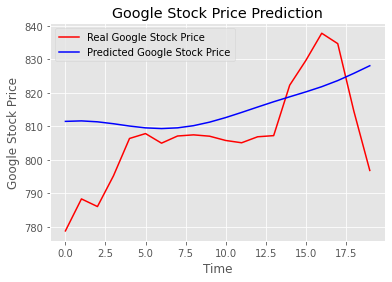

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()